<div style="display: flex; align-items: center;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Practica 4: Introducción a los biopotenciales y adquisición de señales ECG y EMG</font></b></h1>
                <h3><font color='0B5345'>Luisa Fernanda Enciso - Jader Stalyn Chingal Atis</font></h3>
    </div>
</div>

<hr>
<h3><strong>Código usado para la adquisición de señales</strong></h3>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 21 20:49:08 2022

@author: Francisco Campuzano
"""
import serial, time
import numpy as np
import matplotlib.pyplot as plt

# Inicialización del puerto serial
arduino = serial.Serial('COM5', 9600, timeout=0.01)
time.sleep(2)

numero_datos = 1000  # Número de datos a adquirir
EMG = np.ndarray((0), dtype=int)  # Arreglo para almacenar la señal

# Mientras no tengamos suficientes datos, seguir leyendo
while EMG.shape[0] < numero_datos:
    datos = arduino.readlines(arduino.inWaiting())
    datos_por_leer = len(datos)

    # Si hay más datos de los necesarios, ajustar
    if len(datos) > numero_datos:
        datos = datos[0:numero_datos]
        valores_leidos = np.zeros(numero_datos, dtype=int)
    else:
        valores_leidos = np.zeros(datos_por_leer, dtype=int)

    posicion = 0
    for dato in datos:
        try:
            valores_leidos[posicion] = int(dato.decode().strip())
        except:
            valores_leidos[posicion] = valores_leidos[posicion-1]
        posicion += 1

    EMG = np.append(EMG, valores_leidos)
    time.sleep(2)

# Asegurar que solo se guarden los datos necesarios
EMG = EMG[0:numero_datos]

# Guardar los datos en un archivo CSV
np.savetxt('datos_ECG3.csv', EMG, delimiter=',', fmt='%d')

# Graficar los datos adquiridos
plt.plot(EMG)
plt.savefig(r'MedicionesECG3.png', dpi=300, bbox_inches='tight')
plt.show()

# Cerrar el puerto serial
arduino.close()

<hr>
<h3><strong>Leer archivo de datos</strong></h3>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Función para leer un archivo CSV y graficar
def graficar_csv(archivo_csv, titulo):
    # Leer el archivo CSV
    datos = pd.read_csv(archivo_csv)

    # Graficar
    plt.figure(figsize=(8, 6))
    
    # Graficar la única columna contra el índice
    plt.plot(datos.index, datos.iloc[:, 0], linestyle='-', color='#6495ED')  
    plt.title(titulo, fontname='Times New Roman', fontsize=16)
    plt.xlabel('Muestras', fontname='Times New Roman')
    plt.ylabel('Amplitud', fontname='Times New Roman')
    plt.grid(True)

    # Configurar Times New Roman para todos los textos
    plt.xticks(fontname='Times New Roman')
    plt.yticks(fontname='Times New Roman')
    
    plt.show()


<hr>
<h3><strong>Señal EMG</strong></h3>

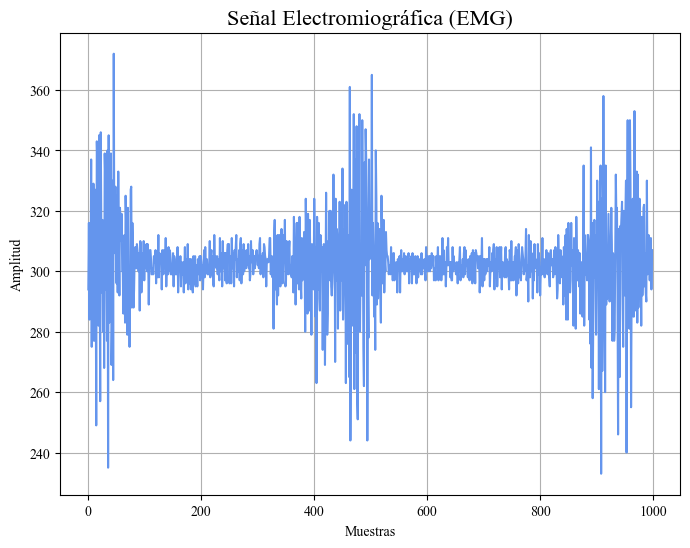

In [21]:
# Ruta del archivo CSV
directorio_actual = os.getcwd()  # Obtiene el directorio actual
archivo = os.path.join(directorio_actual, 'datos_EMG.csv')  # Ruta del archivo en el directorio actual
titulo_grafico = 'Señal Electromiográfica (EMG)'  # Título 
graficar_csv(archivo, titulo_grafico)

<hr>
<h3><strong>Señal ECG</strong></h3>

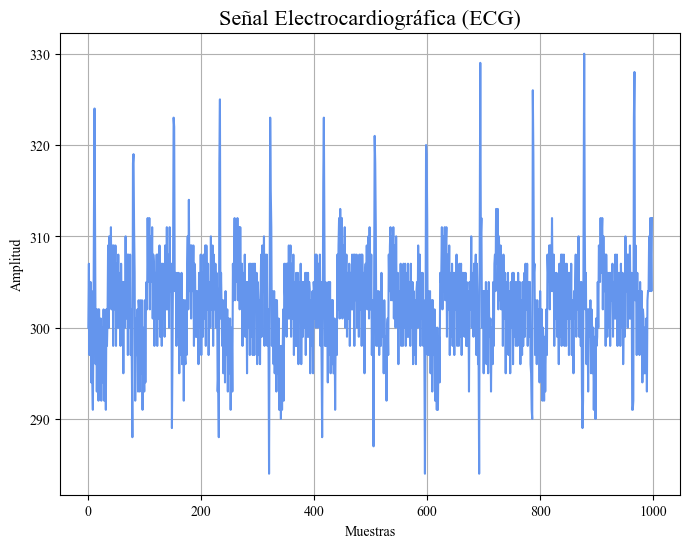

In [22]:
# Ruta del archivo CSV
directorio_actual = os.getcwd()  # Obtiene el directorio actual
archivo = os.path.join(directorio_actual, 'datos_ECG1.csv')  # Ruta del archivo en el directorio actual
titulo_grafico = 'Señal Electrocardiográfica (ECG)'  # Título 
graficar_csv(archivo, titulo_grafico)